In [1]:
#import libraries
from fastai.vision.all import *
from fastai.distributed import *
from google.colab import drive
import zipfile
import pandas as pd
from fastai.vision.widgets import *

In [2]:
# mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# list files in the mounted GDrive folder
!ls "/content/drive/My Drive/techlabs"

 classifier_working.ipynb			   'image caption notes.docx'
 coco_training.ipynb				    image_labels_2.csv
'Copy of classifier_working.ipynb'		    image_labels.csv
'Copy of OpenAI CLIP simple implementation.ipynb'   image_labels.gsheet
'github token.txt'				    images
'git pull request lines.txt'			    scraping.py


In [15]:
# copy the csv file containing the label dataset
!cp -av "/content/drive/My Drive/techlabs/image_labels_2.csv" "image_labels.csv"

'/content/drive/My Drive/techlabs/image_labels_2.csv' -> 'image_labels.csv'


In [16]:
# copy all images and store them in the 'images' folder
!cp -av "/content/drive/My Drive/techlabs/images" "images"

'/content/drive/My Drive/techlabs/images' -> 'images/images'
'/content/drive/My Drive/techlabs/images/1.jpg' -> 'images/images/1.jpg'
'/content/drive/My Drive/techlabs/images/2.jpg' -> 'images/images/2.jpg'
'/content/drive/My Drive/techlabs/images/3.jpg' -> 'images/images/3.jpg'
'/content/drive/My Drive/techlabs/images/4.jpg' -> 'images/images/4.jpg'
'/content/drive/My Drive/techlabs/images/5.jpg' -> 'images/images/5.jpg'
'/content/drive/My Drive/techlabs/images/6.jpg' -> 'images/images/6.jpg'
'/content/drive/My Drive/techlabs/images/7.jpg' -> 'images/images/7.jpg'
'/content/drive/My Drive/techlabs/images/8.jpg' -> 'images/images/8.jpg'
'/content/drive/My Drive/techlabs/images/9.jpg' -> 'images/images/9.jpg'
'/content/drive/My Drive/techlabs/images/10.jpg' -> 'images/images/10.jpg'
'/content/drive/My Drive/techlabs/images/11.jpg' -> 'images/images/11.jpg'
'/content/drive/My Drive/techlabs/images/12.jpg' -> 'images/images/12.jpg'
'/content/drive/My Drive/techlabs/images/13.jpg' -> 'imag

In [17]:
# read label dataset
labels = pd.read_csv('image_labels.csv')
labels.head(), labels.tail()

(  image_id  label
 0        1    art
 1        2    art
 2        3  dirty
 3        4    art
 4        5    art,        image_id   label
 825  poster_121  poster
 826  poster_123  poster
 827  poster_127  poster
 828  poster_129  poster
 829  poster_130  poster)

In [18]:
# add extension to the image name strings
labels['image_id'] = [(str(o).strip() + '.jpg') for o in labels['image_id']]

In [19]:
# drop rows without labels
labels.dropna(axis = 0, inplace = True)

In [20]:
labels

,image_id,label
0,1.jpg,art
1,2.jpg,art
2,3.jpg,dirty
3,4.jpg,art
4,5.jpg,art
...,...,...
825,poster_121.jpg,poster
826,poster_123.jpg,poster
827,poster_127.jpg,poster
828,poster_129.jpg,poster


In [21]:
# DataBlock object.
boxes = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(),
                   get_x=ColReader(0,  pref='/content/images/'),
                   get_y=ColReader(1),
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.90))

In [22]:
# create a DataLoaders object
dls = boxes.dataloaders(labels)

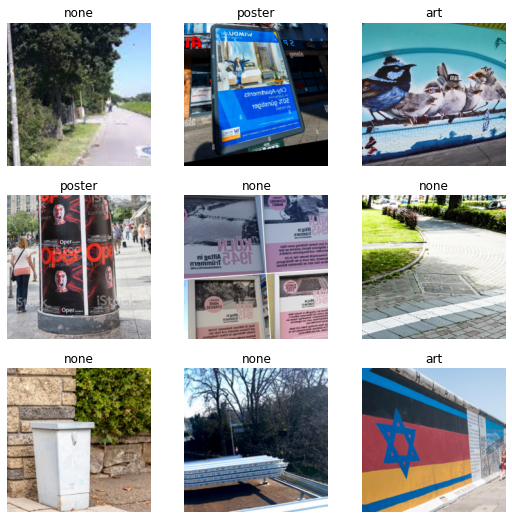

In [23]:
# see a sample batch of images with labels
dls.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

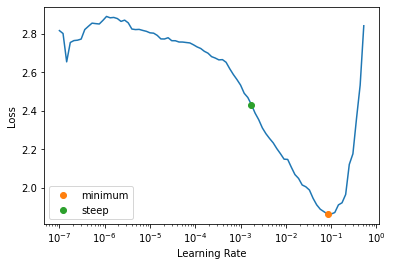

In [24]:
# learning rate finder
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [25]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 1.74e-03


In [26]:
lr_steep

0.001737800776027143

In [39]:
learn.fine_tune(10, base_lr=lr_steep, cbs=SaveModelCallback(every_epoch=2))

epoch,train_loss,valid_loss,error_rate,time
0,2.165122,1.345414,0.392638,00:24


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.370853,1.039858,0.361963,00:23
1,1.310943,0.926949,0.294479,00:23
2,1.106550,0.881280,0.263804,00:23
3,0.981168,0.824042,0.245399,00:23
4,0.849149,0.821478,0.226994,00:23
5,0.737204,0.845683,0.202454,00:23
6,0.635564,0.853679,0.220859,00:23
7,0.558651,0.849504,0.226994,00:23
8,0.498091,0.849547,0.226994,00:23
9,0.437959,0.840090,0.226994,00:23


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

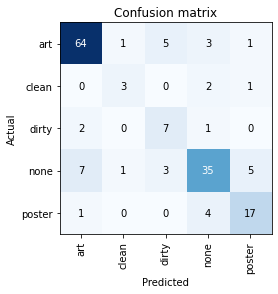

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [46]:
# further improvement may come from adding more images for 'none' and 'dirty' categories
interp.most_confused()

[('none', 'art', 7),
 ('art', 'dirty', 5),
 ('none', 'poster', 5),
 ('poster', 'none', 4),
 ('art', 'none', 3),
 ('none', 'dirty', 3),
 ('clean', 'none', 2),
 ('dirty', 'art', 2),
 ('art', 'clean', 1),
 ('art', 'poster', 1),
 ('clean', 'poster', 1),
 ('dirty', 'none', 1),
 ('none', 'clean', 1),
 ('poster', 'art', 1)]

In [42]:
# I re-wrote ImagesCleaner class, which is the base of ImageClassifierCleaner()
## ImageClassifierCleaner failed for this project, because its function set_fns() needs to be fed
## paths to every image, but my DataLoaders uses only the names of the images not the paths

def get_top_losses(classifier, ds_idx = 0):
  '''
  input: ds_idx 0 for training set, 1 for valid set
  '''
  # set dl as the chosen dataloader, either training or valid
  dl = classifier.dls[ds_idx].new(shuffle=False, drop_last=False)

  #use the classifier to get predictions
  probs,targs,preds,losses = classifier.get_preds(dl=dl, with_input=False, with_loss=True, with_decoded=True)
  
  # make a copy of the dataloaders 
  table_dl = dl.dataset.items.copy()

  #add a column of losses 
  table_dl.loc[:, 'losses']= losses

  # sort losses before returning table
  return table_dl.sort_values(by = ['losses'], ascending=False)


In [44]:
top_losses = get_top_losses(learn, ds_idx = 0)
top_losses.head(25)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


,image_id,label,losses
787,poster_58.jpg,poster,3.636794
478,art_64.jpg,art,3.424973
476,art_62.jpg,art,2.893295
617,art_220.jpg,art,2.780057
369,373.jpg,art,2.360497
311,315.jpg,dirty,2.168173
224,225.jpg,art,2.146915
124,125.jpg,art,2.048484
139,140.jpg,art,1.834140
52,53.jpg,poster,1.762092


In [47]:
learn.export()

In [48]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [49]:
learn_inf = load_learner(path/'export.pkl')

In [50]:
learn_inf.dls.vocab

['art', 'clean', 'dirty', 'none', 'poster']

In [60]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [62]:
img = PILImage.create(btn_upload.data[-1])

In [63]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [64]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dirty; Probability: 0.9812')

In [54]:
btn_run = widgets.Button(description='Classify')

In [55]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [65]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])